In [1]:
#import analysis_util as au
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys, os
from glob import glob
import pickle5 as pickle

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

sys.path.append("/localdata2/jent_so/LM_GenderBias")

In [2]:
def posneg(list):
    pos = [x for x in list if x>0]
    neg = [x for x in list if x<0]
    
#    print(len(pos), len(neg)) 
    return np.mean(pos), np.mean(neg), len(pos), len(neg)
    

def rename(name):
    specs = [
        ['N_pro', 'remove Pronouns'], 
        ['N_weat', 'remove WEAT'], 
        ['N_all', 'remove All'],
        ['mix_pro', 'mix Pronouns'], 
        ['mix_weat', 'mix WEAT'], 
        ['mix_all', 'mix All'], 
        ['original_Rall', 'All'], 
        ['original_Rweat', 'WEAT'], 
        ['original_Rpro', 'Pronouns'], 
    ]
        #['original']
    for spec in specs:
        if spec[0] in name:
            return spec[0]
        #    return spec[1]
    print("error")


def calc_bias_dict(df_dict):
    bias_dict = {}

    for spec in df_dict.keys():
        bias_l = df_dict[spec].bias.tolist()
        # total bias
        overall_bias_total = np.mean(bias_l)
        overall_bias_total_noZero = np.mean([i for i in bias_l if i != 0])
        # absolute bias
        overall_bias_abs = np.mean([abs(x) for x in bias_l])
        overall_bias_abs_noZero = np.mean([abs(x) for x in bias_l if x != 0])
        # pos neg bias 
        pos, neg, pos_n, neg_n = posneg(bias_l) 

        bias_dict[spec] = [
            overall_bias_total, # 0
            overall_bias_abs, # 1
            pos, neg, # 2 3 
            pos_n, neg_n, # 4 5 
            overall_bias_total_noZero, # 6
            overall_bias_abs_noZero  ] # 7 
    return bias_dict


In [3]:
def get_bias(task = 'IMDB', model_id_= None):
    files = glob("../res_results/ratings/*")
    o = '../res_results/ratings/rating_{}_{}_original'.format(task, model_id_)
    if o in files:
        files.remove(o)

    df_dict = {}
    for file in files: 
        if '_{}_'.format(model_id_) in file and task in file:
            with open (file, "rb") as fh:
                data = pickle.load(fh)
            df_dict[rename(file)] = data
    return df_dict


In [4]:
IMDB_training_details = [
    ["IMDB", "albertbase", "N_all", 0.1, 5 ],  
    ["IMDB", "albertbase", "N_pro", 0.05, 4 ], 
    ["IMDB", "albertbase", "N_weat", 0.05, 8 ],
    ["IMDB", "albertbase", "mix_all", 0.1, 19 ],
    ["IMDB", "albertbase", "mix_pro", 0.1, 13 ], 
    ["IMDB", "albertbase", "mix_weat", 0.2, 6 ],
    ["IMDB", "albertbase", "original", 0.1, 8 ], 
    ["IMDB", "albertlarge", "N_all", 0.05, 17 ],
    ["IMDB", "albertlarge", "N_pro", 0.05, 11 ],
    ["IMDB", "albertlarge", "N_weat", 0.05, 12 ],
    ["IMDB", "albertlarge", "mix_all", 0.2, 18 ],
    ["IMDB", "albertlarge", "mix_pro", 0.1, 7 ],
    ["IMDB", "albertlarge", "mix_weat", 0.1, 19 ],
    ["IMDB", "albertlarge", "original", 0.2, 12 ], 
    ["IMDB", "bertbase", "N_all", 0.1, 12 ],
    ["IMDB", "bertbase", "N_pro", 0.1, 11 ],
    ["IMDB", "bertbase", "N_weat", 0.1, 12 ],
    ["IMDB", "bertbase", "mix_all", 0.2, 12], 
    ["IMDB", "bertbase", "mix_pro", 0.2, 5 ], 
    ["IMDB", "bertbase", "mix_weat", 0.2, 10 ],
    ["IMDB", "bertbase", "original", 0.1, 10 ],
    ["IMDB", "bertlarge", "N_all", 0.05, 19 ],
    ["IMDB", "bertlarge", "N_pro", 0.05, 7 ], 
    ["IMDB", "bertlarge", "N_weat", 0.1, 6 ],
    ["IMDB", "bertlarge", "mix_all", 0.2, 14 ],
    ["IMDB", "bertlarge", "mix_pro", 0.2, 19 ],
    ["IMDB", "bertlarge", "mix_weat", 0.2, 13 ],
    ["IMDB", "bertlarge", "original", 0.05, 13],
    ["IMDB", "distbase", "N_all", 0.05, 16 ],
    ["IMDB", "distbase", "N_pro", 0.05, 18 ],
    ["IMDB", "distbase", "N_weat", 0.05, 19 ],
    ["IMDB", "distbase", "mix_all", 0.2, 14 ],
    ["IMDB", "distbase", "mix_pro", 0.2, 18 ],
    ["IMDB", "distbase", "mix_weat", 0.2, 19 ],
    ["IMDB", "distbase", "original", 0.05, 8 ],
    ["IMDB", "robertabase", "N_all", 0.05, 10],
    ["IMDB", "robertabase", "N_pro", 0.05, 7],
    ["IMDB", "robertabase", "N_weat", 0.05, 10],
    ["IMDB", "robertabase", "mix_all", 0.05, 11],
    ["IMDB", "robertabase", "mix_pro", 0.05, 4],
    ["IMDB", "robertabase", "mix_weat", 0.05, 7],
    ["IMDB", "robertabase", "original", 0.05, 8],
    ["IMDB", "robertalarge", "N_all", 0.05, 15 ],
    ["IMDB", "robertalarge", "N_pro", 0.05, 10 ],
    ["IMDB", "robertalarge", "N_weat", 0.05, 14 ],
    ["IMDB", "robertalarge", "mix_all", 0.05, 5 ],
    ["IMDB", "robertalarge", "mix_pro", 0.05, 5 ],
    ["IMDB", "robertalarge", "mix_weat", 0.05, 5 ],
    ["IMDB", "robertalarge", "original", 0.05, 11 ]
]

In [8]:
def r(n, d = 4):
    return round(n, d)


---  
  
---  
  
---  

In [6]:
# specs = ['original_Rpro', 'mix_pro', 'original_Rall', 'mix_all', 'original_Rweat', 'N_pro', 'N_weat', 'mix_weat', 'N_all']
specs = ['original_Rall', 'original_Rweat', 'original_Rpro', "N_pro", "N_weat", "N_all", "mix_pro", "mix_weat", "mix_all"]#, ]
model_ids = ["albertbase", "albertlarge", "bertbase", "bertlarge", "distbase", "robertabase", "robertalarge"]


# get_bias_bydict does basically the same as calc_bias_dict, but for singe specs instead of a whole model_id 
# get_bias_bydict takes returns single values per spec, while calc_bias_dict returns a dict wiht specs as keys and values as values
def get_bias_bydict(dic, spec):
    df = dic[spec]
    df_no_zero = df.loc[(df != 0).all(axis=1)]
    
    bias = df.bias.mean()
    zero_bias = df_no_zero.bias.mean()
    
    neg_count = 0
    pos_count =0
    zero_count = 0
    for elem in df.bias.tolist():
        if elem >0:
            pos_count+=1
        elif elem <0:
            neg_count+=1
        elif elem ==0:
            zero_count+=1
            
    return bias, zero_bias, neg_count, pos_count, zero_count    
    
for model in model_ids: 
    dic = get_bias('IMDB', model_id_ = model)
    for spec in specs:
        b, zb, neg, pos, zero = get_bias_bydict(dic, spec)
        print(model, "& ", spec,"& ", b,"& ", zb,"& ", neg,"& ", pos,"& ", zero, "\\""\\ ")

albertbase &  original_Rall &  -0.0019348283542320133 &  -0.00233033236285592 &  9112 &  11645 &  4243 \\ 
albertbase &  original_Rweat &  0.00014532426968216896 &  0.00019842199574299422 &  7710 &  10600 &  6690 \\ 
albertbase &  original_Rpro &  0.0007203491327539087 &  0.0011053724723083548 &  5481 &  10811 &  8708 \\ 
albertbase &  N_pro &  -0.00028908527866005896 &  -0.0004436272768093717 &  9305 &  6986 &  8709 \\ 
albertbase &  N_weat &  -0.0032442289778590204 &  -0.004434914941298967 &  10346 &  7942 &  6712 \\ 
albertbase &  N_all &  0.0007778982762806117 &  0.0009373171827171435 &  8979 &  11769 &  4252 \\ 
albertbase &  mix_pro &  0.0013528452794149051 &  0.0020861788789398364 &  7244 &  8968 &  8788 \\ 
albertbase &  mix_weat &  -0.002433704402707517 &  -0.003439573184899538 &  9426 &  8263 &  7311 \\ 
albertbase &  mix_all &  -0.0011561673726711889 &  -0.0014092040523026531 &  9481 &  11030 &  4489 \\ 
albertlarge &  original_Rall &  0.011371183886015789 &  0.0137406156484

In [69]:
    
for model in model_ids: 
    dic = get_bias('IMDB', model_id_ = model)
    for spec in specs:
        b, zb, neg, pos, zero = get_bias_bydict(dic, spec)
        print(model, "& ", spec,"& $", round(b,4 ),"$ & $", round(zb, 4),"$ & ", neg,"& ", pos,"& ", zero, "\\""\\ ")

albertbase &  original_Rall & $ -0.0019 $ & $ -0.0023 $ &  9112 &  11645 &  4243 \\ 
albertbase &  original_Rweat & $ 0.0001 $ & $ 0.0002 $ &  7710 &  10600 &  6690 \\ 
albertbase &  original_Rpro & $ 0.0007 $ & $ 0.0011 $ &  5481 &  10811 &  8708 \\ 
albertbase &  N_pro & $ -0.0003 $ & $ -0.0004 $ &  9305 &  6986 &  8709 \\ 
albertbase &  N_weat & $ -0.0032 $ & $ -0.0044 $ &  10346 &  7942 &  6712 \\ 
albertbase &  N_all & $ 0.0008 $ & $ 0.0009 $ &  8979 &  11769 &  4252 \\ 
albertbase &  mix_pro & $ 0.0014 $ & $ 0.0021 $ &  7244 &  8968 &  8788 \\ 
albertbase &  mix_weat & $ -0.0024 $ & $ -0.0034 $ &  9426 &  8263 &  7311 \\ 
albertbase &  mix_all & $ -0.0012 $ & $ -0.0014 $ &  9481 &  11030 &  4489 \\ 
albertlarge &  original_Rall & $ 0.0114 $ & $ 0.0137 $ &  5095 &  15594 &  4311 \\ 
albertlarge &  original_Rweat & $ 0.0095 $ & $ 0.013 $ &  4058 &  14191 &  6751 \\ 
albertlarge &  original_Rpro & $ 0.0056 $ & $ 0.0086 $ &  2120 &  14075 &  8805 \\ 
albertlarge &  N_pro & $ 0.0022 $

### final complete bias table for supplementary results

In [5]:

# final complete bias table for supplementary results

for model in model_ids: # ['distbase', 'bertbase', 'bertlarge', 'robertabase', 'robertalarge', 'albertabase', 'albertalarge']: 
    dic = get_bias('IMDB', model_id_ = model)
    bias_dict = calc_bias_dict(dic) 
    for spec in ['original_Rpro', "N_pro", "mix_pro",
                 'original_Rweat', "N_weat", "mix_weat",
                 'original_Rall', "N_all", "mix_all"]:
        overall_bias_total, overall_bias_abs, pos, neg, pos_n, neg_n, overall_bias_total_noZero, overall_bias_abs_noZero = bias_dict[spec]
        b, zb, neg, pos, zero = get_bias_bydict(dic, spec)
        assert(overall_bias_total==b)
        assert(overall_bias_total_noZero==zb)
        print(model, "& ", spec,"& ",
              r(overall_bias_abs_noZero), "& ", r(zb), "& ",
              r(overall_bias_abs), "& ", r(b), "& ",
              neg,"& ", pos,"& ", zero, "\\""\\ ")

albertbase &  original_Rpro &  0.0037 &  0.0011 &  0.0024 &  0.0007 &  5481 &  10811 &  8708 \\ 
albertbase &  N_pro &  0.0029 &  -0.0004 &  0.0019 &  -0.0003 &  9305 &  6986 &  8709 \\ 
albertbase &  mix_pro &  0.0054 &  0.0021 &  0.0035 &  0.0014 &  7244 &  8968 &  8788 \\ 
albertbase &  original_Rweat &  0.0093 &  0.0002 &  0.0068 &  0.0001 &  7710 &  10600 &  6690 \\ 
albertbase &  N_weat &  0.0082 &  -0.0044 &  0.006 &  -0.0032 &  10346 &  7942 &  6712 \\ 
albertbase &  mix_weat &  0.0131 &  -0.0034 &  0.0093 &  -0.0024 &  9426 &  8263 &  7311 \\ 
albertbase &  original_Rall &  0.0089 &  -0.0023 &  0.0074 &  -0.0019 &  9112 &  11645 &  4243 \\ 
albertbase &  N_all &  0.008 &  0.0009 &  0.0067 &  0.0008 &  8979 &  11769 &  4252 \\ 
albertbase &  mix_all &  0.0071 &  -0.0014 &  0.0058 &  -0.0012 &  9481 &  11030 &  4489 \\ 
albertlarge &  original_Rpro &  0.0086 &  0.0086 &  0.0056 &  0.0056 &  2120 &  14075 &  8805 \\ 
albertlarge &  N_pro &  0.0049 &  0.0034 &  0.0032 &  0.0022 & 

### final condensed bias table for paper results

In [9]:
special_spec =  ['original_Rpro', "N_pro", "mix_pro",
                 'original_Rweat', "N_weat", "mix_weat",
                 'original_Rall', "N_all", "mix_all"]

res_dic = {}
res_dic['ss'] = special_spec
for m in model_ids:
    res_dic[m+'_abs'] = []
    res_dic[m+'_tot'] = []

for model in model_ids: 
    dic = get_bias('IMDB', model_id_ = model)
    bias_dict = calc_bias_dict(dic) 

    for spec in special_spec:
        overall_bias_total, overall_bias_abs, pos, neg, pos_n, neg_n, overall_bias_total_noZero, overall_bias_abs_noZero = bias_dict[spec]
        res_dic[model+'_abs'].append(r(overall_bias_abs_noZero))
        res_dic[model+'_tot'].append(r(overall_bias_total_noZero))
        
res = pd.DataFrame(res_dic)
res = res.transpose()
res

,0,1,2,3,4,5,6,7,8
ss,original_Rpro,N_pro,mix_pro,original_Rweat,N_weat,mix_weat,original_Rall,N_all,mix_all
albertbase_abs,0.0037,0.0029,0.0054,0.0093,0.0082,0.0131,0.0089,0.008,0.0071
albertbase_tot,0.0011,-0.0004,0.0021,0.0002,-0.0044,-0.0034,-0.0023,0.0009,-0.0014
albertlarge_abs,0.0086,0.0049,0.0016,0.0155,0.0074,0.0091,0.0172,0.0114,0.0101
albertlarge_tot,0.0086,0.0034,-0.0008,0.013,-0.0032,-0.0009,0.0137,-0.0032,0.0034
bertbase_abs,0.0025,0.0036,0.0023,0.0037,0.0038,0.0027,0.0056,0.006,0.0055
bertbase_tot,0.0013,0.0031,-0.0,0.0015,0.002,-0.0002,0.0035,0.0041,0.0005
bertlarge_abs,0.0031,0.005,0.0035,0.0069,0.0048,0.0056,0.0082,0.0095,0.0101
bertlarge_tot,-0.0016,0.0046,0.0011,-0.0032,-0.0011,0.0034,0.0009,0.0042,0.0015
distbase_abs,0.0021,0.0022,0.0022,0.0035,0.0037,0.0027,0.0047,0.0045,0.0052


In [10]:
print(res.to_latex())

\begin{tabular}{llllllllll}
\toprule
{} &              0 &       1 &        2 &               3 &       4 &         5 &              6 &       7 &        8 \\
\midrule
ss               &  original\_Rpro &   N\_pro &  mix\_pro &  original\_Rweat &  N\_weat &  mix\_weat &  original\_Rall &   N\_all &  mix\_all \\
albertbase\_abs   &         0.0037 &  0.0029 &   0.0054 &          0.0093 &  0.0082 &    0.0131 &         0.0089 &   0.008 &   0.0071 \\
albertbase\_tot   &         0.0011 & -0.0004 &   0.0021 &          0.0002 & -0.0044 &   -0.0034 &        -0.0023 &  0.0009 &  -0.0014 \\
albertlarge\_abs  &         0.0086 &  0.0049 &   0.0016 &          0.0155 &  0.0074 &    0.0091 &         0.0172 &  0.0114 &   0.0101 \\
albertlarge\_tot  &         0.0086 &  0.0034 &  -0.0008 &           0.013 & -0.0032 &   -0.0009 &         0.0137 & -0.0032 &   0.0034 \\
bertbase\_abs     &         0.0025 &  0.0036 &   0.0023 &          0.0037 &  0.0038 &    0.0027 &         0.0056 &   0.006 &   0.0055 \\
be

In [11]:
special_spec =  ['original_Rpro', "N_pro", "mix_pro",
                 'original_Rweat', "N_weat", "mix_weat",
                 'original_Rall', "N_all", "mix_all"]

res_dic = {'mods':model_ids}
for spec in special_spec:
    res_dic[spec+'_abs'] = []
    res_dic[spec+'_tot'] = []

for model in model_ids: 
    dic = get_bias('IMDB', model_id_ = model)
    bias_dict = calc_bias_dict(dic) 

    for spec in special_spec:
        overall_bias_total, overall_bias_abs, pos, neg, pos_n, neg_n, overall_bias_total_noZero, overall_bias_abs_noZero = bias_dict[spec]
        res_dic[spec+'_abs'].append(r(overall_bias_abs_noZero))
        res_dic[spec+'_tot'].append(r(overall_bias_total_noZero))
        
res = pd.DataFrame(res_dic)
res = res.transpose()

print(res[[4, 2, 3, 5,6, 0, 1]].to_latex())

\begin{tabular}{llllllll}
\toprule
{} &         4 &         2 &          3 &            5 &             6 &           0 &            1 \\
\midrule
mods               &  distbase &  bertbase &  bertlarge &  robertabase &  robertalarge &  albertbase &  albertlarge \\
original\_Rpro\_abs  &    0.0021 &    0.0025 &     0.0031 &       0.0024 &        0.0024 &      0.0037 &       0.0086 \\
original\_Rpro\_tot  &    0.0009 &    0.0013 &    -0.0016 &       0.0016 &        0.0015 &      0.0011 &       0.0086 \\
N\_pro\_abs          &    0.0022 &    0.0036 &      0.005 &       0.0024 &        0.0025 &      0.0029 &       0.0049 \\
N\_pro\_tot          &     0.001 &    0.0031 &     0.0046 &       0.0009 &        0.0015 &     -0.0004 &       0.0034 \\
mix\_pro\_abs        &    0.0022 &    0.0023 &     0.0035 &       0.0021 &         0.002 &      0.0054 &       0.0016 \\
mix\_pro\_tot        &   -0.0012 &      -0.0 &     0.0011 &      -0.0002 &        0.0004 &      0.0021 &      -0.0008 \\
original

In [36]:
dict_albertbase = get_bias('IMDB', model_id_="albertbase")
dict_albertlarge = get_bias('IMDB', model_id_="albertlarge")
dict_bertbase = get_bias('IMDB', model_id_="bertbase")
dict_bertlarge = get_bias('IMDB', model_id_="bertlarge")
dict_distbase = get_bias('IMDB', model_id_="distbase")
dict_robertabase = get_bias('IMDB', model_id_="robertabase")
dict_robertalarge = get_bias('IMDB', model_id_="robertalarge")

In [12]:
df_no_zero = df.loc[(df != 0).all(axis=1)]

NameError: name 'df' is not defined

---  
  
---  
  
---  

# merge bias and accuracy 

In [14]:
# load accuracies 
accs = pd.read_pickle('../res_results/IMDB_evaluation_df')

In [15]:
batch_size_dic = {
    "albertbase": 16,
    "albertlarge": 8,
    "bertbase": 32,
    "bertlarge": 16,
    "distbase": 32,
    "robertabase": 32,
    "robertalarge": 16 
}

In [17]:
specs_2 = ['original',      'original',      'original',       "N_pro", "N_weat", "N_all", "mix_pro", "mix_weat", "mix_all"]
specs_1 = ['original_Rpro', 'original_Rall', 'original_Rweat', 'N_pro', 'N_weat', 'N_all', 'mix_pro', 'mix_weat', 'mix_all']

model_ids = ["albertbase", "albertlarge", "bertbase", "bertlarge", "distbase", "robertabase", "robertalarge"]

model_l = []
spec_l = []
abs_b_l = []
abs_zb_l = []
b_l = []
zb_l = []
b_pos = []
b_neg = []
acc_l = []
rec_l = []
pre_l = []
f1s_l = []
bs_l = []
lr_l = []
epoch_l = []

for model in model_ids: 
    dic = get_bias('IMDB', model_id_ = model)
    bias_dict = calc_bias_dict(dic) 
    
    for i in range(len(specs_1)):
        spec = specs_1[i]
        spec_a = specs_2[i]
        b, zb, neg, pos, zero = get_bias_bydict(dic, spec)
        overall_bias_total, overall_bias_abs, pos, neg, pos_n, neg_n, overall_bias_total_noZero, overall_bias_abs_noZero = bias_dict[spec]
        
        b_pos.append(np.mean([x for x in dic[spec].bias.tolist() if x>0]))
        b_neg.append(np.mean([x for x in dic[spec].bias.tolist() if x<0]))

        df = accs
        df = df.loc[(df['spec']== spec_a) & (df['model_id'] == model )]
        # print(df)
        if df.shape[0]==2:
            #print('###')
            df = df.loc[(df['test_data']== 'equal') & (df['model_id'] == model ),['accuracy','recall', 'precision', 'f1', 'test_data']]
        assert(df.shape[0] ==1)
        
        model_l.append(model) 
        spec_l.append(spec) 
        assert(b == overall_bias_total )
        assert(zb == overall_bias_total_noZero )
        abs_b_l.append(overall_bias_abs)
        abs_zb_l.append(overall_bias_abs_noZero) 
        b_l.append(b) 
        zb_l.append(zb) 
        acc_l.append(df.iloc[0]['accuracy'])
        rec_l.append(df.iloc[0]['recall'])
        pre_l.append(df.iloc[0]['precision'])
        f1s_l.append(df.iloc[0]['f1'])
        
        bs_l.append(batch_size_dic[model])
        for elem in IMDB_training_details:
            #print(elem[1], model , elem[2],spec )
            if elem[1]== model and elem[2]==spec_a: 
                lr = elem[3]
                ep = elem[4]
        lr_l.append(lr)
        epoch_l.append(ep)

        #print(model, "& ", spec,"& $", round(b,4 ),"$ & $", round(zb, 4),"$ & ", neg,"& ", pos,"& ", zero, "\\""\\ ")
        print(len(acc_l), len(rec_l), len(pre_l), len(f1s_l))

assert(len(model_l) == len(spec_l) == len(b_l) == len(zb_l) == len(b_pos) == len(b_neg) == len(acc_l) == len(rec_l) == len(pre_l) == len(f1s_l))
acc_bias_df = pd.DataFrame({
    "model": model_l,
    "spec": spec_l,
    "abs_bias": abs_b_l,
    "abs_bias_nz": abs_zb_l,
    "bias": b_l,
    "bias_nz": zb_l,
    "bias_p": b_pos,
    "bias_n": b_neg,
    "accuracy": acc_l,
    "recall": rec_l,
    "precision": pre_l,
    "f1": f1s_l,
    "batch_size": bs_l,
    "lr": lr_l,
    "epoch": epoch_l
})

1 1 1 1
2 2 2 2
3 3 3 3
4 4 4 4
5 5 5 5
6 6 6 6
7 7 7 7
8 8 8 8
9 9 9 9
10 10 10 10
11 11 11 11
12 12 12 12
13 13 13 13
14 14 14 14
15 15 15 15
16 16 16 16
17 17 17 17
18 18 18 18
19 19 19 19
20 20 20 20
21 21 21 21
22 22 22 22
23 23 23 23
24 24 24 24
25 25 25 25
26 26 26 26
27 27 27 27
28 28 28 28
29 29 29 29
30 30 30 30
31 31 31 31
32 32 32 32
33 33 33 33
34 34 34 34
35 35 35 35
36 36 36 36
37 37 37 37
38 38 38 38
39 39 39 39
40 40 40 40
41 41 41 41
42 42 42 42
43 43 43 43
44 44 44 44
45 45 45 45
46 46 46 46
47 47 47 47
48 48 48 48
49 49 49 49
50 50 50 50
51 51 51 51
52 52 52 52
53 53 53 53
54 54 54 54
55 55 55 55
56 56 56 56
57 57 57 57
58 58 58 58
59 59 59 59
60 60 60 60
61 61 61 61
62 62 62 62
63 63 63 63


In [18]:
acc_bias_df.describe()

,abs_bias,abs_bias_nz,bias,bias_nz,bias_p,bias_n,accuracy,recall,precision,f1,batch_size,lr,epoch
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,0.003904,0.005260,0.000881,0.001198,0.005306,-0.004546,0.800241,0.776937,0.822896,0.796176,21.714286,0.095238,11.047619
std,0.002739,0.003364,0.002352,0.003108,0.003628,0.003387,0.031634,0.046971,0.058452,0.020779,9.359192,0.060050,4.308389
min,0.001036,0.001593,-0.003244,-0.004435,0.000926,-0.015527,0.692880,0.659840,0.630437,0.749443,8.000000,0.050000,4.000000
25%,0.001875,0.002791,-0.000188,-0.000269,0.002880,-0.005674,0.783710,0.748240,0.798586,0.780596,16.000000,0.050000,8.000000
50%,0.003013,0.003912,0.000692,0.000944,0.004370,-0.003238,0.814560,0.777600,0.839959,0.803509,16.000000,0.050000,11.000000
75%,0.005263,0.007027,0.001550,0.002045,0.006221,-0.002203,0.819640,0.789160,0.862380,0.811721,32.000000,0.100000,13.000000
max,0.014267,0.017240,0.011371,0.013741,0.020551,-0.000033,0.835500,0.932240,0.882478,0.832061,32.000000,0.200000,19.000000


In [19]:
acc_bias_df.corr(method="pearson")

,abs_bias,abs_bias_nz,bias,bias_nz,bias_p,bias_n,accuracy,recall,precision,f1,batch_size,lr,epoch
abs_bias,1.000000,0.986988,0.391281,0.360378,0.925773,-0.747664,-0.453647,0.183805,-0.464667,-0.459802,-0.535054,0.312904,0.223250
abs_bias_nz,0.986988,1.000000,0.392828,0.372960,0.937695,-0.739893,-0.480855,0.178438,-0.486080,-0.496982,-0.570574,0.384817,0.224320
bias,0.391281,0.392828,1.000000,0.993999,0.654125,0.289798,0.058979,-0.244035,0.132373,-0.063398,-0.162859,0.262973,0.049358
bias_nz,0.360378,0.372960,0.993999,1.000000,0.640023,0.321998,0.044056,-0.250922,0.126380,-0.085231,-0.174655,0.271259,0.048419
bias_p,0.925773,0.937695,0.654125,0.640023,1.000000,-0.487482,-0.359690,0.048426,-0.340478,-0.421502,-0.531545,0.401761,0.230960
bias_n,-0.747664,-0.739893,0.289798,0.321998,-0.487482,1.000000,0.541940,-0.407249,0.601394,0.439259,0.407143,-0.192896,-0.175183
accuracy,-0.453647,-0.480855,0.058979,0.044056,-0.359690,0.541940,1.000000,-0.561005,0.933316,0.886411,0.592581,-0.064883,0.072211
recall,0.183805,0.178438,-0.244035,-0.250922,0.048426,-0.407249,-0.561005,1.000000,-0.778842,-0.116956,-0.029757,0.115034,0.077771
precision,-0.464667,-0.486080,0.132373,0.126380,-0.340478,0.601394,0.933316,-0.778842,1.000000,0.694691,0.495498,-0.133557,-0.036355
f1,-0.459802,-0.496982,-0.063398,-0.085231,-0.421502,0.439259,0.886411,-0.116956,0.694691,1.000000,0.706392,-0.028871,0.111774


In [27]:
def get_starlets(val):
    if val < 0.001:
        return '***'
    elif val< 0.01:
        return '**'
    elif val < 0.05:
        return '*'
    else:
        return 'ns'
    
from scipy.stats import pearsonr
def calculate_pvalues(df, starlets=False):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            val = round(pearsonr(df[r], df[c])[1], 5)
            if starlets: 
                pvalues[r][c] = get_starlets(val)
            else:
                pvalues[r][c] = val
    return pvalues

In [21]:
print(acc_bias_df.columns)

Index(['model', 'spec', 'abs_bias', 'abs_bias_nz', 'bias', 'bias_nz', 'bias_p',
       'bias_n', 'accuracy', 'recall', 'precision', 'f1', 'batch_size', 'lr',
       'epoch'],
      dtype='object')


In [30]:
bar = acc_bias_df[[
    'model', 
    'spec', 
   # "abs_bias",
    "abs_bias_nz",
   # 'bias', 
    'bias_nz', 
   # 'bias_p', 
   # 'bias_n', 
    'accuracy',
    #'recall', 
   # 'precision', 
    'f1', 
    'batch_size', 
    'lr',
    'epoch']]
print(bar.corr(method="pearson").to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  abs\_bias\_nz &   bias\_nz &  accuracy &        f1 &  batch\_size &        lr &     epoch \\
\midrule
abs\_bias\_nz &     1.000000 &  0.372960 & -0.480855 & -0.496982 &   -0.570574 &  0.384817 &  0.224320 \\
bias\_nz     &     0.372960 &  1.000000 &  0.044056 & -0.085231 &   -0.174655 &  0.271259 &  0.048419 \\
accuracy    &    -0.480855 &  0.044056 &  1.000000 &  0.886411 &    0.592581 & -0.064883 &  0.072211 \\
f1          &    -0.496982 & -0.085231 &  0.886411 &  1.000000 &    0.706392 & -0.028871 &  0.111774 \\
batch\_size  &    -0.570574 & -0.174655 &  0.592581 &  0.706392 &    1.000000 & -0.077076 & -0.099656 \\
lr          &     0.384817 &  0.271259 & -0.064883 & -0.028871 &   -0.077076 &  1.000000 &  0.250259 \\
epoch       &     0.224320 &  0.048419 &  0.072211 &  0.111774 &   -0.099656 &  0.250259 &  1.000000 \\
\bottomrule
\end{tabular}



In [31]:
calculate_pvalues(bar)

,abs_bias_nz,bias_nz,accuracy,f1,batch_size,lr,epoch
abs_bias_nz,0.0,0.00261,0.00007,0.00003,0.0,0.00185,0.07716
bias_nz,0.00261,0.0,0.73171,0.50659,0.17098,0.03152,0.70629
accuracy,0.00007,0.73171,0.0,0.0,0.0,0.61341,0.57383
f1,0.00003,0.50659,0.0,0.0,0.0,0.82228,0.38313
batch_size,0.0,0.17098,0.0,0.0,0.0,0.54823,0.4371
lr,0.00185,0.03152,0.61341,0.82228,0.54823,0.0,0.04791
epoch,0.07716,0.70629,0.57383,0.38313,0.4371,0.04791,0.0


In [32]:
calculate_pvalues(bar, True)

,abs_bias_nz,bias_nz,accuracy,f1,batch_size,lr,epoch
abs_bias_nz,***,**,***,***,***,**,ns
bias_nz,**,***,ns,ns,ns,*,ns
accuracy,***,ns,***,***,***,ns,ns
f1,***,ns,***,***,***,ns,ns
batch_size,***,ns,***,***,***,ns,ns
lr,**,*,ns,ns,ns,***,*
epoch,ns,ns,ns,ns,ns,*,***


<AxesSubplot:xlabel='b'>

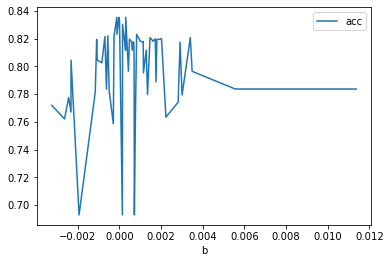

In [103]:
foo = acc_bias_df.copy()
foo = foo.sort_values(by='b')
foo.plot(x="b", y="acc")

In [118]:
dic = get_bias('IMDB', model_id_ = model)
dic['N_pro'].columns

Index(['ID', 'text_pro_M', 'text_pro_F', 'pos_prob_m', 'pos_prob_f', 'bias'], dtype='object')

## Hypothesis testing

In [ ]:
def stats(df):
    bias_twoSided = scipy.stats.wilcoxon(df['delta_rat'].tolist(), alternative="two-sided", correction=True).pvalue
    bias_oneSided = scipy.stats.wilcoxon(df['delta_rat'].tolist(), alternative="greater", correction=True).pvalue
    effect_size = [df[df['delta_rat']<0].shape[0] , df[df['delta_rat']==0].shape[0] , df[df['delta_rat']>0].shape[0]]
#    print('sample relation to 0:    ', effect_size)
#    print('pvalue two sided:     ', bias_twoSided)
#    print('pvalue pos bias:      ',  bias_oneSided)
#    print('mean: ', df['delta_rat'].mean(),'std: ', df['delta_rat'].std())
   
    bias_twoSided_abs = scipy.stats.wilcoxon(df['bias_abs'].tolist(), alternative="two-sided", correction=True).pvalue
    bias_oneSided_abs = scipy.stats.wilcoxon(df['bias_abs'].tolist(), alternative="greater", correction=True).pvalue
    effect_size_abs = [df[df['bias_abs']<0].shape[0] , df[df['bias_abs']==0].shape[0] , df[df['bias_abs']>0].shape[0]]
#    print('sample relation to 0:    ', effect_size_abs)
#    print('pvalue two sided:     ', bias_twoSided_abs)
#    print('pvalue pos bias:      ',  bias_oneSided_abs)
#    print('mean: ', df['bias_abs'].mean(),'std: ', df['bias_abs'].std())
    
    print('[',df['delta_rat'].mean(),', ', bias_twoSided, ', ', bias_oneSided, ', ', df['delta_rat'].std(),', ', effect_size, '], ')    
    print('[',df['bias_abs'].mean(),', ', bias_twoSided_abs,', ', bias_oneSided_abs,', ', df['bias_abs'].std(),', ', effect_size_abs, '], ')

In [9]:
from scipy.stats import ranksums, wilcoxon

def stats(x,y,a="two-sided"):
        rs = wilcoxon(x,y,alternative=a)
        s = 'X'
        if rs[1] < 0.001:
            s = '***'
        elif rs[1] < 0.01:
            s = '**'
        elif rs[1] < 0.05:
            s = '*'
        return rs, s



for model in model_ids: 
    dic = get_bias('IMDB', model_id_ = model)
    for spec in specs:
        m = dic[spec]['pos_prob_m'].tolist()
        f = dic[spec]['pos_prob_f'].tolist()
        rs, s = stats(m,f)
        if rs[1]>0.001:
            print( model, spec,'####', rs, s )
        #print(stats(m,f, 'greater'))
        #print(stats(m,f, 'less'))


albertlarge mix_weat #### WilcoxonResult(statistic=82160517.0, pvalue=0.4725537616112815) X
bertbase mix_pro #### WilcoxonResult(statistic=57645635.0, pvalue=0.1099774631247071) X
distbase mix_all #### WilcoxonResult(statistic=100953063.5, pvalue=0.048991050176962585) *
robertabase mix_weat #### WilcoxonResult(statistic=83453375.0, pvalue=0.7985806099014158) X
robertabase mix_all #### WilcoxonResult(statistic=107260133.5, pvalue=0.8738001567421141) X
